In [10]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout, execute_plot, find_max_train_save

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [12]:
random_runs = [
    "kobybibas/pnml_for_active_learning/2palajx7",
    "kobybibas/pnml_for_active_learning/24xqy2e8",
    "kobybibas/pnml_for_active_learning/dxl6szid",
    "kobybibas/pnml_for_active_learning/t6wkrpsl",
    "kobybibas/pnml_for_active_learning/2ego13ig",
    "kobybibas/pnml_for_active_learning/rg4sqy5h",
]
bald_runs = [
    "kobybibas/pnml_for_active_learning/27g8ifx2",
    "kobybibas/pnml_for_active_learning/kzmjr06a",
    "kobybibas/pnml_for_active_learning/pysfz64s",
    "kobybibas/pnml_for_active_learning/2ch57n8z",
    "kobybibas/pnml_for_active_learning/38i91s0p",
    "kobybibas/pnml_for_active_learning/j1ue5rdz",
]

kmean_runs = [
    "kobybibas/pnml_for_active_learning/7lj8pwys",
    "kobybibas/pnml_for_active_learning/1jxwlrb0",
    "kobybibas/pnml_for_active_learning/pqzsjol1",
    "kobybibas/pnml_for_active_learning/ct06qreh",
    "kobybibas/pnml_for_active_learning/1dph2pqf",
    "kobybibas/pnml_for_active_learning/2k933no9",
]

epig_runs = [
    "kobybibas/pnml_for_active_learning/1kleiq7b",
    "kobybibas/pnml_for_active_learning/3nrqj5p9",
    "kobybibas/pnml_for_active_learning/duhrgkxw",
    "kobybibas/pnml_for_active_learning/hzef7jdt",
    "kobybibas/pnml_for_active_learning/3uw4gull",
    "kobybibas/pnml_for_active_learning/3e8vxyia",
]

pnml_runs = [
    "kobybibas/pnml_for_active_learning/2xpm68hm",
    "kobybibas/pnml_for_active_learning/1wdvyguw",
    "kobybibas/pnml_for_active_learning/19awk80d",
    "kobybibas/pnml_for_active_learning/ozujthib",
    "kobybibas/pnml_for_active_learning/2ipwg137",
    "kobybibas/pnml_for_active_learning/2v0ile3m",
]

random_dfs = process_results(api=api, run_list=random_runs, use_ood=True)
bald_dfs = process_results(api=api, run_list=bald_runs, use_ood=True)
kmean_dfs = process_results(api=api, run_list=kmean_runs, use_ood=True)
epig_dfs = process_results(api=api, run_list=epig_runs, use_ood=True)
pnml_dfs = process_results(api=api, run_list=pnml_runs, use_ood=True)

kobybibas/pnml_for_active_learning/2palajx7
Index(['_step', 'training_set_size', 'test_acc', 'test_loss',
       'label_-1_ratio'],
      dtype='object')
kobybibas/pnml_for_active_learning/24xqy2e8
Index(['_step', 'training_set_size', 'test_acc', 'test_loss',
       'label_-1_ratio'],
      dtype='object')
kobybibas/pnml_for_active_learning/dxl6szid
Index(['_step', 'training_set_size', 'test_acc', 'test_loss',
       'label_-1_ratio'],
      dtype='object')
kobybibas/pnml_for_active_learning/t6wkrpsl
Index(['_step', 'training_set_size', 'test_acc', 'test_loss',
       'label_-1_ratio'],
      dtype='object')
kobybibas/pnml_for_active_learning/2ego13ig
Index(['_step', 'training_set_size', 'test_acc', 'test_loss',
       'label_-1_ratio'],
      dtype='object')
kobybibas/pnml_for_active_learning/rg4sqy5h
Index(['_step', 'training_set_size', 'test_acc', 'test_loss',
       'label_-1_ratio'],
      dtype='object')
kobybibas/pnml_for_active_learning/27g8ifx2
Index(['_step', 'training_set_si

In [13]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs, rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs, rolling_size=rolling_size)
kmean_res = execute_df_rollout(kmean_dfs, rolling_size=rolling_size)
epig_res = execute_df_rollout(epig_dfs, rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs, rolling_size=rolling_size)
plot_list = [
    (random_res, "Random"),
    (bald_res, "Bald"),
    (kmean_res, "Core-set"),
    (epig_res, "EPIG"),
    (pnml_res, "DIAL"),
]


In [14]:
row = find_max_train_save(pnml_res, bald_res)
print(100 * row.training_set_size_left / row.training_set_size_right)
print(row)

66.19718309859155
training_set_size_left     2820.000000
test_acc_left                 0.650837
test_acc_round                0.651000
training_set_size_right    4260.000000
test_acc_right                0.651340
Name: 357, dtype: float64


Random
Bald
Core-set
EPIG
DIAL
CIFAR10 OOD


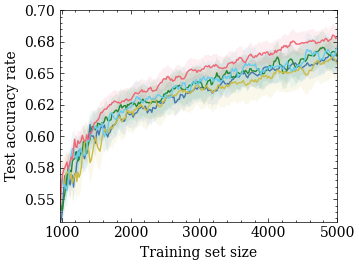

In [15]:
plt.style.use(["science", "bright", "no-latex"])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4 * 0.95, 3 * 0.95))
fig, ax = execute_plot(plot_list, fig, ax)
ax.set_xlim(right=5000)
ax.get_legend().remove()
print("CIFAR10 OOD")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "cifar10_ood.pdf"))
plt.show()


# OOD Ratio

Random
Bald
Core-set
EPIG
DIAL
CIFAR10 OOD


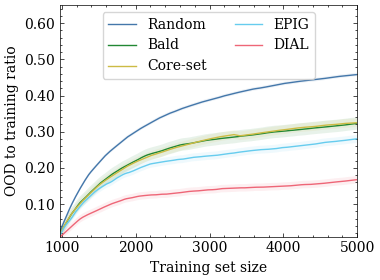

In [16]:
rolling_size = 5
random_res = execute_df_rollout(
    random_dfs, rolling_size=rolling_size, metric="label_-1_ratio"
)
bald_res = execute_df_rollout(
    bald_dfs, rolling_size=rolling_size, metric="label_-1_ratio"
)
kmean_res = execute_df_rollout(
    kmean_dfs, rolling_size=rolling_size, metric="label_-1_ratio"
)
epig_res = execute_df_rollout(
    epig_dfs, rolling_size=rolling_size, metric="label_-1_ratio"
)
pnml_res = execute_df_rollout(
    pnml_dfs, rolling_size=rolling_size, metric="label_-1_ratio"
)
plot_list = [
    (random_res, "Random"),
    (bald_res, "Bald"),
    (kmean_res, "Core-set"),
    (epig_res, "EPIG"),
    (pnml_res, "DIAL"),
]

fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig, ax = execute_plot(plot_list, fig, ax)
ax.set_xlim(right=5000)
ax.set_ylabel("OOD to training ratio")
# ax.get_legend().remove()
ax.set_ylim(top=0.65)
ax.legend(ncol=2, frameon=True, loc="upper center")
print("CIFAR10 OOD")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "cifar10_ood_ratio.pdf"))
plt.show()

# table

In [17]:
eps = 0.005
acc_values = [0.6, 0.62, 0.65]
for dict_df, method in plot_list:
    print(method)
    df = dict_df["mean"]

    for acc in acc_values:
        print(f"{acc}\t {df[(df > acc - eps ) & (df <= acc )].index[0]}")

Random


IndexError: index 0 is out of bounds for axis 0 with size 0